In [1]:
%load_ext rpy2.ipython

In [2]:
import json

In [22]:
data = json.load(open('run-30.json'))['data']

In [25]:
x_label = 'optimizationSteps'
y_label = 'runtimeInMilliseconds'

xs = []
ys = []

data = sorted(data, key = lambda d: d[x_label])

for datum in data:
    xs.append(datum[x_label])
    ys.append(datum[y_label])
    
%Rpush x_label y_label xs ys

In [26]:
xs, ys

([15,
  48,
  52,
  62,
  92,
  113,
  188,
  209,
  231,
  607,
  626,
  663,
  665,
  752,
  762,
  956,
  1002,
  1108,
  1301,
  1309,
  1346,
  1352,
  1431,
  1468,
  1650,
  1712,
  1728,
  1794,
  1815,
  1852],
 [7079,
  5837,
  9816,
  3894,
  2250,
  4482,
  15269,
  12737,
  5038,
  7631,
  11006,
  7102,
  9103,
  9668,
  6456,
  4226,
  22738,
  8861,
  12047,
  10442,
  4665,
  5295,
  1852,
  3478,
  68756,
  12388,
  4407,
  50067,
  10899,
  3418])

   ParameterValue Measurement
1              15        7079
2              48        5837
3              52        9816
4              62        3894
5              92        2250
6             113        4482
7             188       15269
8             209       12737
9             231        5038
10            607        7631
11            626       11006
12            663        7102
13            665        9103
14            752        9668
15            762        6456
16            956        4226
17           1002       22738
18           1108        8861
19           1301       12047
20           1309       10442
21           1346        4665
22           1352        5295
23           1431        1852
24           1468        3478
25           1650       68756
26           1712       12388
27           1728        4407
28           1794       50067
29           1815       10899
30           1852        3418


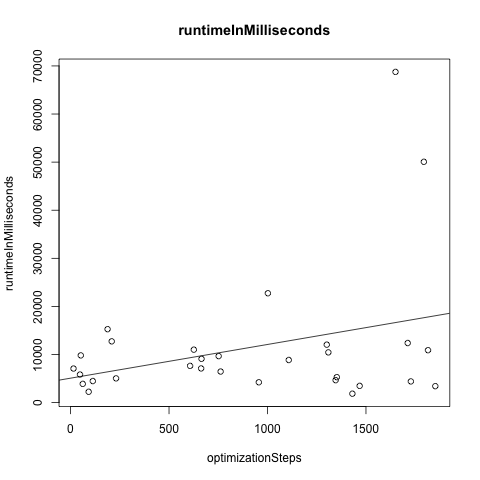

In [27]:
%%R

d <- data.frame(ParameterValue=xs, Measurement=ys)
regression_line <- lm(Measurement ~ ParameterValue, d)
plot(Measurement ~ ParameterValue, 
     d,
     main=y_label, 
     ylab=y_label,
     xlab=x_label)
abline(regression_line)

d